**Calibration of CIR** <br>
CIR model in optimization <br>
60-month (5-year) calibration period <br>
Initial parameters from Duarte, Longstaff, Yu (2006)

In [1]:
import cir as ci
%run monthly_data.ipynb

In [1]:
# Initial parameters
alpha = 0.0009503
beta = 0.0113727
sigma =  0.0548290
mu =  0.0240306
gamma = 0.4628664
eta =  0.0257381

k1 = beta * 1.6
theta1 = alpha/beta
sigma1 = sigma
k2 = gamma
theta2 = mu/gamma
sigma2 = eta

'''
k1 = 0.005389
theta1 = 0.999946
sigma1 = 0.000133
k2 = 0.856672
theta2 = 0.092588
sigma2 = 0.000728
'''

'\nk1 = 0.005389\ntheta1 = 0.999946\nsigma1 = 0.000133\nk2 = 0.856672\ntheta2 = 0.092588\nsigma2 = 0.000728\n'

In [2]:
k1

0.01819632

In [3]:
theta1

0.0835597527412136

In [4]:
sigma1

0.054829

In [5]:
k2

0.4628664

In [6]:
theta2

0.05191692462447047

In [7]:
sigma2

0.0257381

In [2]:
import math
2*k1*theta1 > math.pow(sigma1, 2)

True

In [3]:
2*k2*theta2 > math.pow(sigma2, 2)

True

In [3]:
#ci.optimize_parameters(k1, theta1, sigma1, k2, theta2, sigma2, 0.5, '2012-01-31', 60, data1_swap_model.loc[0:60,:])
#ci.sum_of_squared(data1_swap_model.loc[60,'USD2YS':'USD9YS'],data1_swap_model.loc[70,'USD2YS':'USD9YS'])
#((pd.DataFrame([[1,2],[8,9]]) - pd.DataFrame([[4,4],[7,7]])) ** 2).values.sum()

ValueError: Cannot load a SolverResults object with bad status: error

In [3]:
model_swap_rates, parameter_data = ci.swap_rates_after_date(k1, theta1, sigma1, k2, theta2, sigma2, 0.5, '2015-01-30', 96, data1_swap_model)
model_swap_rates

2012-01-31T00:00:00.000000000
2012-02-29T00:00:00.000000000
2012-03-30T00:00:00.000000000
2012-04-30T00:00:00.000000000
2012-05-31T00:00:00.000000000
2012-06-29T00:00:00.000000000
2012-07-31T00:00:00.000000000
2012-08-31T00:00:00.000000000
2012-09-28T00:00:00.000000000
2012-10-31T00:00:00.000000000
2012-11-30T00:00:00.000000000
2012-12-31T00:00:00.000000000
2013-01-31T00:00:00.000000000
2013-02-28T00:00:00.000000000
2013-03-29T00:00:00.000000000
2013-04-30T00:00:00.000000000
2013-05-28T00:00:00.000000000
2013-06-28T00:00:00.000000000
2013-07-31T00:00:00.000000000
2013-08-29T00:00:00.000000000
2013-09-30T00:00:00.000000000
2013-10-31T00:00:00.000000000
2013-11-28T00:00:00.000000000
2013-12-31T00:00:00.000000000
2014-01-30T00:00:00.000000000
2014-02-28T00:00:00.000000000
2014-03-31T00:00:00.000000000
2014-04-30T00:00:00.000000000
2014-05-29T00:00:00.000000000
2014-06-30T00:00:00.000000000
2014-07-31T00:00:00.000000000
2014-08-29T00:00:00.000000000
2014-09-29T00:00:00.000000000
2014-10-31

,date,USD1YS,USD2YS,USD3YS,USD4YS,USD5YS,USD6YS,USD7YS,USD8YS,USD9YS,USD10YS
0,2012-01-31,0.00496,0.006997,0.008855,0.010582,0.012211,0.013762,0.015251,0.016685,0.018071,0.01941
1,2012-02-29,0.00489,0.007266,0.009377,0.011293,0.013063,0.014721,0.016289,0.017783,0.019211,0.02058
2,2012-03-30,0.00496,0.007816,0.010279,0.012456,0.014419,0.016218,0.017889,0.019457,0.020936,0.02234
3,2012-04-30,0.00504,0.007233,0.009225,0.011071,0.012805,0.014450,0.016022,0.017531,0.018982,0.02038
4,2012-05-31,0.00569,0.006758,0.007933,0.009184,0.010487,0.011822,0.013174,0.014532,0.015883,0.01722
...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,0.00154,0.005065,0.006884,0.007740,0.008177,0.008568,0.009160,0.010093,0.011434,0.01319
116,2021-09-30,0.00176,0.005509,0.007594,0.008734,0.009451,0.010107,0.010938,0.012079,0.013591,0.01548
117,2021-10-29,0.00314,0.006490,0.008288,0.009225,0.009804,0.010370,0.011147,0.012261,0.013765,0.01566
118,2021-11-29,0.00346,0.006646,0.008331,0.009198,0.009740,0.010295,0.011081,0.012218,0.013756,0.01569


Text(0, 0.5, 'Bps')

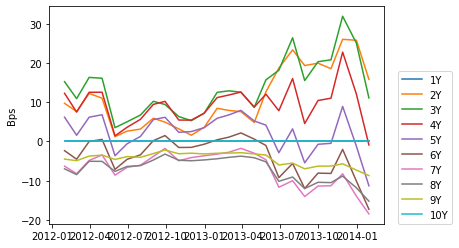

In [10]:
'''
bps = 0.0001
bpsmult = 10000
import matplotlib.pyplot as plt

mispricings = model_swap_rates.loc[:,'USD1YS':'USD10YS'].reset_index().drop(['index'],axis=1) - data1_swap_trade.loc[4:28,'USD1YS':'USD10YS'].reset_index().drop(['index'],axis=1)
mispricings = mispricings*bpsmult #Modifying the mispricings to basis points
plt.plot(model_swap_rates['date'], mispricings)
plt.legend(['1Y','2Y','3Y','4Y','5Y','6Y','7Y','8Y','9Y','10Y'], loc=(1.04,0))
plt.ylabel('Bps')
'''

In [4]:
parameter_data.to_excel('parameters_subperiod_CIR_mod.xlsx')

In [5]:
model_swap_rates.to_excel('rates_subperiod_CIR_mod.xlsx')

In [6]:
weight_data = ci.solve_w1w10_for_data(parameter_data, 0.5)
weight_data.to_excel('weights_subperiod_CIR_mod.xlsx')
weight_data

,date,weights2,weights3,weights4,weights5,weights6,weights7,weights8,weights9
0,2012-01-31,"(0.7336433927763589, 0.29421480882959866)","(0.5352853325248972, 0.5086034026423276)","(0.38636070793323385, 0.6647733084414815)","(0.2736331505382722, 0.7781544269176222)","(0.18763872782375005, 0.8598106428011296)","(0.12157513247739729, 0.9177294403999737)","(0.07051878519226562, 0.9577285155904729)","(0.03087618232183563, 0.9840894713610652)"
1,2012-02-29,"(0.7333692243790589, 0.2946854359241204)","(0.5348403568201057, 0.5092839576704904)","(0.38585820390718384, 0.6654675714810496)","(0.2731565937383054, 0.7787464784744109)","(0.1872384627934895, 0.860249821179914)","(0.12127539893626833, 0.9180103865024574)","(0.07032592871087728, 0.9578742675016513)","(0.030785360840281963, 0.9841390654780425)"
2,2012-03-30,"(0.7328701568652353, 0.29562280033525457)","(0.5340423525585359, 0.5106761678191297)","(0.3849584284529545, 0.6669517135192399)","(0.2722977502094361, 0.7800942618469503)","(0.1865082020822937, 0.8613403239743611)","(0.12071914343270569, 0.9187977671626635)","(0.06996030322729571, 0.9583613133274945)","(0.030608755190493213, 0.9843581148406106)"
3,2012-04-30,"(0.7328800712243076, 0.2965792320090902)","(0.5340838169071453, 0.5122568010264354)","(0.3849773056692055, 0.6689252389410698)","(0.27225911383506757, 0.7822385589222491)","(0.1864108949348647, 0.8634324660497006)","(0.1205872291769832, 0.9206247630526654)","(0.06983129211964914, 0.9597315977341955)","(0.030524323066822234, 0.9851088266083036)"
4,2012-05-31,"(0.733785019349329, 0.2954669674715271)","(0.5355126742495285, 0.5106971493474329)","(0.3865511151658325, 0.6674117145058718)","(0.27371668015063966, 0.7810375083356139)","(0.18760740395334263, 0.8626309569319076)","(0.12146352288851783, 0.920192972792968)","(0.07038306491017413, 0.9595735616461148)","(0.030778751808618162, 0.9850976157775109)"
...,...,...,...,...,...,...,...,...,...
115,2021-08-31,"(0.8619948973914687, 0.1352714369564937)","(0.7233370746320096, 0.2768776825743485)","(0.5893462477660326, 0.41675169326710204)","(0.4632306792594049, 0.5493031323086448)","(0.3469879078718736, 0.670575937775067)","(0.24191346040980638, 0.7777581719776134)","(0.14883257157338298, 0.8689583995428135)","(0.06817707014953522, 0.9431239151338423)"
116,2021-09-30,"(0.8610891303540331, 0.1367894900337534)","(0.7217164021377876, 0.2794989010361362)","(0.5872409663843793, 0.4200300068569038)","(0.46090667818288866, 0.5527859171198904)","(0.3447219364554428, 0.6738434687546213)","(0.23996252698857184, 0.780463147473508)","(0.14740749872621473, 0.8708550029749519)","(0.06742545276863475, 0.9440813140197722)"
117,2021-10-29,"(0.8597505870143403, 0.13941215163928375)","(0.7197778727954479, 0.2834371638825736)","(0.5851439270993085, 0.4244176531922264)","(0.458913160070422, 0.5570501608319166)","(0.3429906448507824, 0.6776020539193954)","(0.2385929702426158, 0.783460813293112)","(0.1464631106156214, 0.8729273040263664)","(0.06694445103518898, 0.9451346900207771)"
118,2021-11-29,"(0.8585741469191791, 0.1412647554813026)","(0.7179654664145634, 0.2863588317392164)","(0.583075394333992, 0.4278180103589266)","(0.456856919942264, 0.5604830441807367)","(0.3411401188209295, 0.6807274318537516)","(0.23708896133502536, 0.7860214565139593)","(0.14540572223423148, 0.8747366269934136)","(0.06639892381824788, 0.9460705283389346)"
